# **Data Wrangling**

Data Wrangling is the process of `cleaning, transforming and organizing` data so that it can be used for `analysis and visualization`. It is important to step in the data analysis process because raw data is often incomplete, inconsistent, and in an unstructured format, which can make it difficult to work with.
- Data Wrangling helps to make the data more `consistent, accurate and useful` for analysis and decision making

### **The steps for data wrangling typically include:**
1. Gathering data (libraries)
2. Tools to clean data (libraries)
3. How to do cleaning (steps)

In [29]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = sns.load_dataset('titanic')

In [31]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [32]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [34]:
# Cleaning the data -> finding missing values
df.isnull().sum() / len(df) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [35]:
# removing column deck
df.drop(columns='deck', inplace=True)

In [36]:
# df's column age fill na with df's age mean
df['age'] = df.age.fillna(value=df['age'].mean())

In [37]:
# It is categorical so we use mode the first common 
df['embarked'] = df.embarked.fillna(value=df['embarked'].mode()[0]) 

In [38]:
df['embark_town'] = df.embark_town.fillna(value=df['embark_town'].mode()[0])

In [39]:
df.isnull().sum() 

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

# **Outliers Removal**

### Method 1: Visualization

<AxesSubplot:xlabel='sex', ylabel='age'>

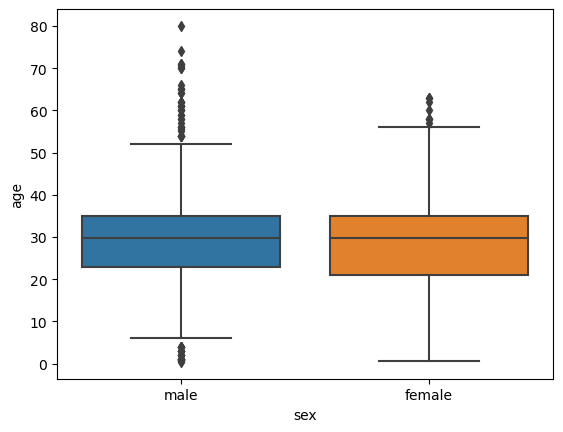

In [40]:
import seaborn as sns

sns.boxplot(data=df, x='sex', y='age')

### Method 2: IQR Method (Inter Quartile Range)

In [41]:
# IQR Method
Q1 = df['age'].quantile(0.25)
Q3= df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['age'] > lower_bound) & (df['age'] < upper_bound)]

In [42]:
# IQR Method
Q1 = df['fare'].quantile(0.25)
Q3= df['fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['fare'] > lower_bound) & (df['fare'] < upper_bound)]

In [43]:
df.shape

(718, 14)

<AxesSubplot:xlabel='age', ylabel='Count'>

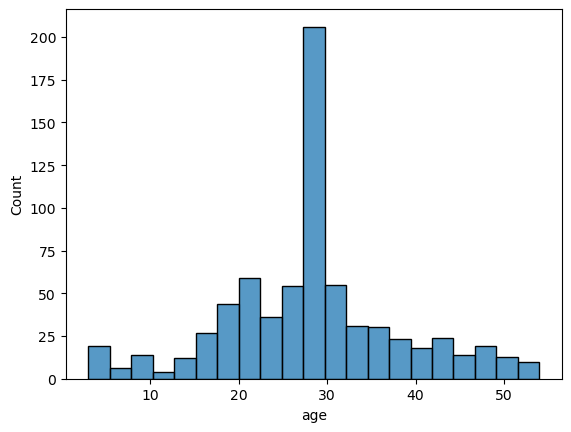

In [44]:
sns.histplot(df['age'])

<AxesSubplot:xlabel='fare', ylabel='Count'>

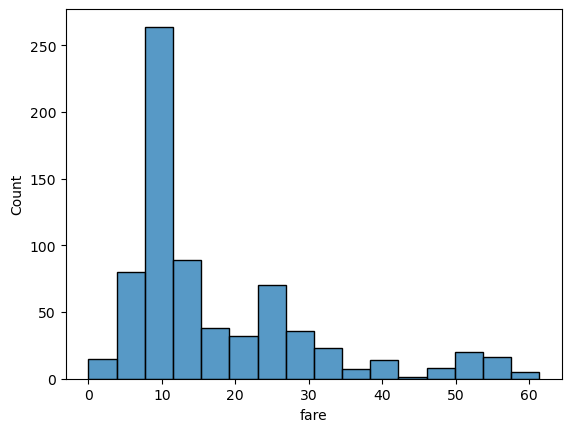

In [45]:
sns.histplot(df['fare'])

### Method 3: Z-Score

In [46]:
# For Z-Score we need library called scipy 
# pip install scipy
from scipy import stats
import numpy as np

zscore = np.abs(stats.zscore(df['age']))
threshold = 3
df = df[(zscore < threshold).all(axis=1)]

ValueError: No axis named 1 for object type Series

In [ ]:
# Assignment -> How to do z-score in Python?

## **Finding and dropping duplicates**

In [48]:
df.shape

(718, 14)

In [49]:
# Finding and dropping duplicates
# Find duplicates
df.duplicated().sum()

103

In [57]:
df_duplicates = df[df.duplicated()]

In [58]:
df_duplicates.head()
# df1.shape

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
47,1,3,female,29.699118,0,0,7.7500,Q,Third,woman,False,Queenstown,yes,True
76,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,Southampton,no,True
77,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
87,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
95,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True


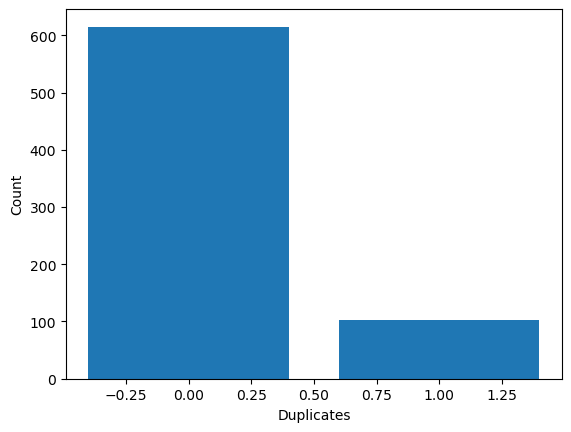

In [61]:
df_duplicates = df.duplicated()
df_duplicates_count = df_duplicates.value_counts()

plt.bar(df_duplicates_count.index, df_duplicates_count.values)
plt.xlabel('Duplicates')
plt.ylabel('Count')
plt.show()

In [63]:
# Dropping duplicates
df.drop_duplicates(inplace=True)

In [64]:
df.shape

(615, 14)

## **Data Normalization**

### **Min-Max Scaling**

`To bring data at one scale`

In [65]:
# 1. Import libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 2. Data
df

# 3. Select columns to normalize
cols_to_normalize = ['age', 'fare']

# 4. Create the scaler function/tool
scaler = MinMaxScaler()

# 5. Fit and transform the data on scaler
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# 6. Check the results
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,0.372549,1,0,0.118118,S,Third,man,True,Southampton,no,False
2,1,3,female,0.450980,0,0,0.129115,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.627451,1,0,0.865114,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.627451,0,0,0.131152,S,Third,man,True,Southampton,no,True
5,0,3,male,0.523512,0,0,0.137804,Q,Third,man,True,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.705882,0,5,0.474509,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,0.313725,0,0,0.488765,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.523512,1,2,0.382051,S,Third,woman,False,Southampton,no,False
889,1,1,male,0.450980,0,0,0.488765,C,First,man,True,Cherbourg,yes,True


In [66]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,0.360976,2.469919,0.497584,0.460163,0.365854,0.298831
std,0.480674,0.741063,0.209485,0.894039,0.835572,0.221334
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.372549,0.000000,0.000000,0.128640
50%,0.000000,3.000000,0.523512,0.000000,0.000000,0.211798
75%,1.000000,3.000000,0.607843,1.000000,0.000000,0.423596
max,1.000000,3.000000,1.000000,5.000000,6.000000,1.000000


### **Standard Scaler**

In [67]:
# 1. Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 2. Data
df

# 3. Select columns to normalize
cols_to_normalize = ['age', 'fare']

# 4. Create the scaler function/tool
scaler = StandardScaler()

# 5. Fit and transform the data on scaler
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# 6. Check the results
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,-0.597354,1,0,-0.817136,S,Third,man,True,Southampton,no,False
2,1,3,female,-0.222648,0,0,-0.767410,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.620441,1,0,2.560585,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.620441,0,0,-0.758201,S,Third,man,True,Southampton,no,True
5,0,3,male,0.123872,0,0,-0.728122,Q,Third,man,True,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.995147,0,5,0.794372,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,-0.878384,0,0,0.858832,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.123872,1,2,0.376301,S,Third,woman,False,Southampton,no,False
889,1,1,male,-0.222648,0,0,0.858832,C,First,man,True,Cherbourg,yes,True


x-stand = (x-mean(x)) / std(x)

Where:
x_stand is the standardized variable x\
x is the original variable\
mean(x) is the mean of variable x\
std(x) is the standard deviation of variable x